# Plot Curvature of Robust Segmentation Models

In [1]:
import torch
import torch.nn as nn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from utils_henaff import *
#import timm
import torchvision
import torchvision.models as models
from torchvision import transforms
import os
import sys

%load_ext autoreload
from fast_curvature import *

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# setting path
#sys.path.append('../../straightening_models/robust_segment/')
sys.path.append('../../segment/')
sys.path.append('../../straightening_models_code/Robust-Semantic-Segmentation/')


## Video

# Robust Segmentaiton Model

In [2]:
#from torchvision.models import resnet50
#from torchvision.models import ResNet50_Weights

from model.pspnet import PSPNet_DDCAT, DeepLabV3_DDCAT,PSPNet, DeepLabV3

models = ['psp','dl3']
defenses = ['nde','ddc','sat']
dataset = ['cit','voc']

m = 'dl3'
df = 'nde'
ds = 'voc'

model_variant = f'{df}_{m}_{ds}'


if ds == 'cit':
    classes = 19
    img_size = 449
    epoch = '400'
elif ds == 'voc':
    classes = 21
    img_size = 473
    epoch = '50'

if m == 'psp':
    if df == 'ddc':
        model = PSPNet_DDCAT(layers=50, classes=classes, zoom_factor=8, pretrained=False)
        model_blocks = [model.layer0,
                    model.layer1,
                    model.layer2,
                    model.layer3,
                    model.layer4,
                    model.ppm,
                    model.cls1,
                    model.mask1,
                    model.cls2
                   ]
        xlabels = ['Pixel','L0', 'L1', 'L2', 'L3','L4','PPM','CLS1','Mask1','CLS2','Output']
    elif df=='nde' or df == 'sat':
        model = PSPNet(layers=50, classes=classes, zoom_factor=8, pretrained=False)
        model_blocks = [model.layer0,
                    model.layer1,
                    model.layer2,
                    model.layer3,
                    model.layer4,
                    model.ppm,
                    model.cls,
                   ]
        xlabels = ['Pixel','L0', 'L1', 'L2', 'L3','L4','PPM','CLS','Output']
elif m=='dl3':
    if df == 'ddc':
        model = DeepLabV3_DDCAT(layers=50, classes=classes, zoom_factor=8, pretrained=False)
        model_blocks = [model.layer0,
                    model.layer1,
                    model.layer2,
                    model.layer3,
                    model.layer4,
                    model.aspp,
                    model.cls1,
                    model.mask1,
                    model.cls2
                   ]
        xlabels = ['Pixel','L0', 'L1', 'L2', 'L3','L4','PPM','CLS1','Mask1','CLS2','Output']
    elif df=='nde' or df == 'sat':
        model = DeepLabV3(layers=50, classes=classes, zoom_factor=8, pretrained=False)
        print(model)
        model_blocks = [model.layer0,
                    model.layer1,
                    model.layer2,
                    model.layer3,
                    model.layer4,
                    model.aspp,
                    model.cls,
                   ]
        xlabels = ['Pixel','L0', 'L1', 'L2', 'L3','L4','PPM','CLS','Output']


vid = load_all_henaff_videos_corrected(img_size=img_size,rgb=True,imagenet=False) # cit
videos = [vid['natural'].float().contiguous().to(device),
          vid['contrast'].float().contiguous().to(device), 
          vid['artificial'].float().contiguous().to(device)]

#nde_psp_cit_400.pth
model_dict = torch.load(f'/home/gridsan/groups/RosenholtzLab/robust_segment/{df}_{m}_{ds}_{epoch}.pth')['state_dict']

renamed_model_dict = {}
for m in model_dict.keys():
    newname = m.replace('module.','')
    renamed_model_dict[newname] = model_dict[m]

# model = PSPNet_DDCAT(pretrained=False)
model.load_state_dict(renamed_model_dict)
#model_arch = 'resnet50'
#model = vonenet.get_model(model_arch=model_arch, pretrained=True)
model = model.to(device)
model.eval()
model


DeepLabV3(
  (criterion): CrossEntropyLoss()
  (layer0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2):

contrast


/data1/groups/RosenholtzLab/PredStraightening/Henaff_straightening/utilities.py:73: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1055.)
  x[i].copy_( imgA ).mul_( 1-t ).add_( t, imgB )


artificial


DeepLabV3(
  (criterion): CrossEntropyLoss()
  (layer0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2):

In [3]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Total params: ', pytorch_total_params)

Total params:  39440362


In [4]:
curvs_natural = get_intermediate_curv(model, model_blocks,videos[0])
curvs_contrast = get_intermediate_curv(model, model_blocks,videos[1])
curvs_artificial = get_intermediate_curv(model, model_blocks,videos[2])

mean_natural = curvs_natural.mean(0)
mean_contrast = curvs_contrast.mean(0)
mean_artificial = curvs_artificial.mean(0)

ste_natural = curvs_natural.std(0)/curvs_natural.size(0)**0.5
ste_contrast = curvs_contrast.std(0)/curvs_contrast.size(0)**0.5
ste_artificial = curvs_artificial.std(0)/curvs_artificial.size(0)**0.5

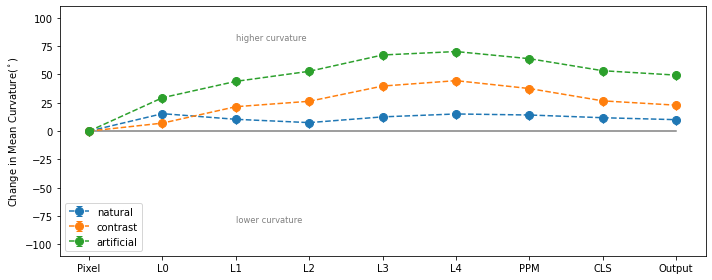

In [5]:
natural_plot = mean_natural - mean_natural[0].repeat(mean_natural.size(0))
contrast_plot = mean_contrast - mean_contrast[0].repeat(mean_contrast.size(0))
artificial_plot = mean_artificial - mean_artificial[0].repeat(mean_artificial.size(0))

output_dir = './robust_segment_curves'
os.makedirs(output_dir,exist_ok=True)

all_curves = {'layer_names':xlabels,'natural_curves':mean_natural, 'contrast_curves':mean_contrast,'artificial_curves':mean_artificial,
              'natural_ste':ste_natural, 'contrast_ste':ste_contrast,'artificial_ste':ste_artificial}

plt.figure(figsize=(10,4))
plt.errorbar(xlabels, natural_plot, yerr=ste_natural, marker = 'o', linestyle='--',markersize=8,label='natural',uplims=True, lolims=True)
plt.errorbar(xlabels, contrast_plot, yerr=ste_contrast, marker = 'o', linestyle='--',markersize=8,label='contrast',uplims=True, lolims=True)
plt.errorbar(xlabels, artificial_plot, yerr=ste_artificial, marker = 'o', linestyle='--',markersize=8,label='artificial',uplims=True, lolims=True)

plt.plot([xlabels[0], xlabels[-1]],[0,0], '-', color='gray')
plt.ylim([-110, 110])
plt.ylabel('Change in Mean Curvature($^\circ$)')
plt.text(xlabels[2], -80,'lower curvature', color='gray',fontsize='small')
plt.text(xlabels[2], 80,'higher curvature', color='gray',fontsize='small')
plt.legend(loc='lower left')
# plt.title('Change in Curvature Across Alexnet Blocks (with PCA)', fontsize=12)
plt.tight_layout()
name = f'segment_{model_variant}'
save_name = os.path.join(output_dir,f'{name}_curve_change.png')
plt.savefig(save_name,dpi=300)
write_model_csv(output_dir, name, all_curves)